In [1]:
# utilities
import csv_treatments
import pre_processing
import reports
import pattern_extraction
import numpy as np

# classification models
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [2]:
csv_path = '/mnt/Dados/Mestrado_Computacao_Aplicada_UFMS/documentos_dissertacao/base_dados/TAB_MODELAGEM_RAFAEL_2020_1.csv'
number_csv_lines = 5000

label_encoder_columns_names = [
    'Maturidade', 'Acabamento', 'QuestionarioClassificacaoEstabel', 'CATEGORIA', 'classificacao'
]
columns_label_encoded = {}

one_hot_encoder_columns_names = [
    'EstabelecimentoMunicipio', 'DataAbate', 'Tipificacao', 'ANO'
]
columns_one_not_encoded = {}

min_max_scaler_columns_names = [
    'Peso',
    'med7d_formITUinst', 'med7d_preR_soja', 'med7d_preR_milho', 'med7d_preR_boi',
    'med1m_formITUinst', 'med1m_preR_soja', 'med1m_preR_milho', 'med1m_preR_boi',
    'med3m_formITUinst', 'med3m_preR_soja', 'med3m_preR_milho', 'med3m_preR_boi',
    'med6m_formITUinst', 'med6m_preR_soja', 'med6m_preR_milho', 'med6m_preR_boi',
    'med12m_formITUinst', 'med12m_preR_soja', 'med12m_preR_milho', 'med12m_preR_boi'
]
columns_min_max_scaled = {}

# delete_columns_names_on_load_data = None
delete_columns_names_on_load_data = [
    'Frigorifico_ID', 'Frigorifico_CNPJ', 'Frigorifico_RazaoSocial', 'Municipio_Frigorifico',
    'EstabelecimentoIdentificador', 'Data_homol', 'Questionario_ID',
    'area so confinamento', 'Lista Trace', 'Motivo', 'data_homol_select', 'dif_datas',
    'DataAbate_6m_ANT', 'data12m', 'data6m', 'data3m', 'data1m', 'data7d',
    'tot7d_Chuva', 'med7d_TempInst', 'med7d_TempMin', 'med7d_UmidInst', 'med7d_formITUmax', 'med7d_NDVI', 'med7d_EVI',
    'tot1m_Chuva', 'med1m_TempInst', 'med1m_UmidInst', 'med1m_NDVI', 'med1m_EVI',
    'tot3m_Chuva', 'med3m_TempInst', 'med3m_UmidInst', 'med3m_formITUmax', 'med3m_NDVI', 'med3m_EVI',
    'tot6m_Chuva', 'med6m_TempInst', 'med6m_UmidInst', 'med6m_NDVI', 'med6m_EVI',
    'tot12m_Chuva', 'med12m_TempInst', 'med12m_TempMin', 'med12m_UmidInst', 'med12m_NDVI', 'med12m_EVI',
]

# Dictionary containing the instantiated classes of classifiers and the parameters for optimization.
classifiers = {}

models_results = {}

# CSV TREATMENTS

In [3]:
precoce_ms_data_frame = csv_treatments.load_data(
    csv_path=csv_path, columns_names=delete_columns_names_on_load_data, number_csv_lines=number_csv_lines)

reports.informations(data_frame=precoce_ms_data_frame)

# reports.print_list_columns(data_frame=precoce_ms_data_frame)

# reports.all_attributes(data_frame=precoce_ms_data_frame)


*****INICIO PRINT INFOS******
Número total de linhas do DataFrame: 5000
Número de colunas: 112
*****FIM PRINT INFOS*********
*****INICIO DELETE COLUNAS******
Coluna Frigorifico_ID excluída.
Coluna Frigorifico_CNPJ excluída.
Coluna Frigorifico_RazaoSocial excluída.
Coluna Municipio_Frigorifico excluída.
Coluna EstabelecimentoIdentificador excluída.
Coluna Data_homol excluída.
Coluna Questionario_ID excluída.
Coluna area so confinamento excluída.
Coluna Lista Trace excluída.
Coluna Motivo excluída.
Coluna data_homol_select excluída.
Coluna dif_datas excluída.
Coluna DataAbate_6m_ANT excluída.
Coluna data12m excluída.
Coluna data6m excluída.
Coluna data3m excluída.
Coluna data1m excluída.
Coluna data7d excluída.
Coluna tot7d_Chuva excluída.
Coluna med7d_TempInst excluída.
Coluna med7d_TempMin excluída.
Coluna med7d_UmidInst excluída.
Coluna med7d_formITUmax excluída.
Coluna med7d_NDVI excluída.
Coluna med7d_EVI excluída.
Coluna tot1m_Chuva excluída.
Coluna med1m_TempInst excluída.
Coluna

# PRE PROCESSING

In [4]:
precoce_ms_data_frame = pre_processing.delete_duplicate_rows_by_attribute(
    data_frame=precoce_ms_data_frame, attribute_name='ID_ANIMAL')

precoce_ms_data_frame = pre_processing.delete_columns(
    data_frame=precoce_ms_data_frame, columns_names=['ID_ANIMAL'])

precoce_ms_data_frame = pre_processing.delete_nan_rows(
    data_frame=precoce_ms_data_frame)

reports.informations(precoce_ms_data_frame)

precoce_ms_data_frame, columns_label_encoded = pre_processing.label_encoder_columns(
    data_frame=precoce_ms_data_frame, columns_label_encoded=columns_label_encoded, columns_names=label_encoder_columns_names)

precoce_ms_data_frame, columns_one_not_encoded = pre_processing.one_hot_encoder_columns(
    data_frame=precoce_ms_data_frame, columns_one_hot_encoded=columns_one_not_encoded, columns_names=one_hot_encoder_columns_names)

precoce_ms_data_frame, columns_min_max_scaled = pre_processing.min_max_scaler_columns(
    data_frame=precoce_ms_data_frame, columns_min_max_scaled=columns_min_max_scaled, columns_names=min_max_scaler_columns_names)

reports.correlation_matrix(
    data_frame=precoce_ms_data_frame, method='pearson', attribute='classificacao',
    display_matrix=True, export_matrix=True, path_save_matrix='./plots')

precoce_ms_data_frame = pre_processing.drop_feature_by_correlation(
    data_frame=precoce_ms_data_frame, method='pearson', columns_names=['Maturidade', 'Acabamento', 'Peso', 'classificacao'])

precoce_ms_data_frame = csv_treatments.move_cloumns_last_positions(
    data_frame=precoce_ms_data_frame, columns_names=['classificacao'])


*****INICIO DELETE DUPLICATE ROWS BY ATTRIBUTE******
*****FIM DELETE DUPLICATE ROWS BY ATTRIBUTE*********

*****INICIO DELETE COLUMNS******
Coluna ID_ANIMAL deletada.
*****FIM DELETE COLUMNS*********

*****INICIO DELETE NAN ROWS******
Linhas com valores NaN encontradas.
*****FIM DELETE NAN ROWS*********

*****INICIO PRINT INFOS******
Número total de linhas do DataFrame: 4393
Número de colunas: 64
*****FIM PRINT INFOS*********

*****INICIO LABEL ENCODER******
*****FIM LABEL ENCODER*********

*****INICIO ONE-HOT ENCODER******

*****INICIO DELETE COLUMNS******
Coluna EstabelecimentoMunicipio deletada.
*****FIM DELETE COLUMNS*********

*****INICIO DELETE COLUMNS******
Coluna DataAbate deletada.
*****FIM DELETE COLUMNS*********

*****INICIO DELETE COLUMNS******
Coluna Tipificacao deletada.
*****FIM DELETE COLUMNS*********

*****INICIO DELETE COLUMNS******
Coluna ANO deletada.
*****FIM DELETE COLUMNS*********
*****FIM ONE-HOT ENCODER*********

*****INICIO MIN-MAX SCALER******
*****FIM MIN-M

,classificacao
Maturidade,-0.050537
Acabamento,0.077714
Peso,0.035261
QuestionarioClassificacaoEstabel,0.003693
FERTIIRRIGACAO,-0.115151
ILP,0.069599
IFP,-0.013719
ILPF,-0.061645
CONCEN_VOLUM,0.030273
CREEPFEEDING,0.048342


/mnt/Dados/Mestrado_Computacao_Aplicada_UFMS/documentos_dissertacao/algoritmos/precoce-ms-classification/.venv-precoce-ms/lib/python3.8/site-packages/dataframe_image/_pandas_accessor.py:69: FutureWarning: this method is deprecated in favour of `Styler.to_html()`
  html = '<div>' + obj.render() + '</div>'
[0809/162925.277085:WARNING:sandbox_linux.cc(376)] InitializeSandbox() called with multiple threads in process gpu-process.
[0809/162925.362839:WARNING:bluez_dbus_manager.cc(247)] Floss manager not present, cannot set Floss enable/disable.
[0809/162925.591163:INFO:headless_shell.cc(660)] Written to file /tmp/tmp57emza_7/temp.png.
[0809/162925.837689:WARNING:sandbox_linux.cc(376)] InitializeSandbox() called with multiple threads in process gpu-process.
[0809/162925.857623:WARNING:bluez_dbus_manager.cc(247)] Floss manager not present, cannot set Floss enable/disable.
[0809/162926.215027:INFO:headless_shell.cc(660)] Written to file /tmp/tmptqssm6cl/temp.png.
[0809/162926.488894:WARNING:sa

*****FIM CORRELATION MATRIX*********

*****INICIO DROP FEATURE BY CORRELATION******
>>> Nenhuma correlação entre a coluna Maturidade e as colunas encontrada.
>>> Nenhuma correlação entre a coluna Acabamento e as colunas encontrada.
>>> Nenhuma correlação entre a coluna Peso e as colunas encontrada.
>>> Nenhuma correlação entre a coluna classificacao e as colunas encontrada.
*****FIM DROP FEATURE BY CORRELATION*********


# PATTERN EXTRACTION

In [5]:
x, y = pattern_extraction.create_x_y_data(data_frame=precoce_ms_data_frame)

print('\nX: ', type(x))
print('Y: ', type(y))

reports.class_distribution(y)


X:  <class 'numpy.ndarray'>
Y:  <class 'numpy.ndarray'>

*****INICIO RELATÓRIO DISTRIBUIÇÃO DE CLASSES******
Distribuição da classe 1: 92%
Distribuição da classe 0: 8%
Erro majoritário: 8%
*****FIM RELATÓRIO DISTRIBUIÇÃO DE CLASSES******



*****INICIO RUN MODELS******

========== Iteração 1 ==========


------ STARTED KNeighborsClassifier parameters tuning
KNeighborsClassifier best params: {'metric': 'euclidean', 'n_neighbors': 19, 'weights': 'distance'}
------ FINISHED KNeighborsClassifier parameters tuning


-------> Executando o Algoritmo: KNeighborsClassifier


------ STARTED GaussianNB parameters tuning
Params of model GaussianNB not defined. Keeping the default parameters.
GaussianNB best params: None
------ FINISHED GaussianNB parameters tuning


-------> Executando o Algoritmo: GaussianNB

========== Iteração 2 ==========


------ STARTED KNeighborsClassifier parameters tuning
KNeighborsClassifier best params: {'metric': 'euclidean', 'n_neighbors': 9, 'weights': 'distance'}
------ FINISHED KNeighborsClassifier parameters tuning


-------> Executando o Algoritmo: KNeighborsClassifier


------ STARTED GaussianNB parameters tuning
Params of model GaussianNB not defined. Keeping the default parameters.
GaussianNB be

,Iteração,Acurácia,Micro Revocação,Macro Revocação,Micro Precisao,Macro Precisao,Micro F1,Macro F1,Melhores Parâmetros
0,1,0.995455,0.995455,0.971429,0.995455,0.997543,0.995455,0.984063,"{'algorithm': 'auto', 'leaf_size': 30, 'metric': 'euclidean', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 19, 'p': 2, 'weights': 'distance'}"
1,2,0.986364,0.986364,0.927337,0.986364,0.977758,0.986364,0.950860,"{'algorithm': 'auto', 'leaf_size': 30, 'metric': 'euclidean', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 9, 'p': 2, 'weights': 'distance'}"
2,3,0.990909,0.990909,0.955908,0.990909,0.981163,0.990909,0.968125,"{'algorithm': 'auto', 'leaf_size': 30, 'metric': 'euclidean', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 3, 'p': 2, 'weights': 'distance'}"
3,4,0.986333,0.986333,0.927334,0.986333,0.977744,0.986333,0.950851,"{'algorithm': 'auto', 'leaf_size': 30, 'metric': 'euclidean', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 5, 'p': 2, 'weights': 'distance'}"
4,5,0.984055,0.984055,0.900000,0.984055,0.991484,0.984055,0.940150,"{'algorithm': 'auto', 'leaf_size': 30, 'metric': 'euclidean', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 13, 'p': 2, 'weights': 'distance'}"
5,6,0.990888,0.990888,0.955905,0.990888,0.981154,0.990888,0.968119,"{'algorithm': 'auto', 'leaf_size': 30, 'metric': 'euclidean', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 11, 'p': 2, 'weights': 'distance'}"
6,7,0.995444,0.995444,0.971429,0.995444,0.997537,0.995444,0.984060,"{'algorithm': 'auto', 'leaf_size': 30, 'metric': 'euclidean', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 3, 'p': 2, 'weights': 'distance'}"
7,8,0.984055,0.984055,0.926096,0.984055,0.962607,0.984055,0.943446,"{'algorithm': 'auto', 'leaf_size': 30, 'metric': 'euclidean', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 3, 'p': 2, 'weights': 'distance'}"
8,9,0.988610,0.988610,0.941620,0.988610,0.979461,0.988610,0.959604,"{'algorithm': 'auto', 'leaf_size': 30, 'metric': 'euclidean', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 13, 'p': 2, 'weights': 'distance'}"
9,10,0.988610,0.988610,0.967716,0.988610,0.955852,0.988610,0.961691,"{'algorithm': 'auto', 'leaf_size': 30, 'metric': 'euclidean', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 3, 'p': 2, 'weights': 'distance'}"


/mnt/Dados/Mestrado_Computacao_Aplicada_UFMS/documentos_dissertacao/algoritmos/precoce-ms-classification/.venv-precoce-ms/lib/python3.8/site-packages/dataframe_image/_pandas_accessor.py:69: FutureWarning: this method is deprecated in favour of `Styler.to_html()`
  html = '<div>' + obj.render() + '</div>'
[0809/163000.765507:WARNING:sandbox_linux.cc(376)] InitializeSandbox() called with multiple threads in process gpu-process.
[0809/163000.814569:WARNING:bluez_dbus_manager.cc(247)] Floss manager not present, cannot set Floss enable/disable.
[0809/163001.104446:INFO:headless_shell.cc(660)] Written to file /tmp/tmpbi5ujf0z/temp.png.
[0809/163001.326162:WARNING:sandbox_linux.cc(376)] InitializeSandbox() called with multiple threads in process gpu-process.
[0809/163001.361986:WARNING:bluez_dbus_manager.cc(247)] Floss manager not present, cannot set Floss enable/disable.
[0809/163001.681499:INFO:headless_shell.cc(660)] Written to file /tmp/tmp6k_uo97e/temp.png.



Describe:
        Acurácia  Micro Revocação  Macro Revocação  Micro Precisao  \
count  10.000000        10.000000        10.000000       10.000000   
mean    0.989072         0.989072         0.944477        0.989072   
std     0.004132         0.004132         0.023958        0.004132   
min     0.984055         0.984055         0.900000        0.984055   
25%     0.986340         0.986340         0.927335        0.986340   
50%     0.988610         0.988610         0.948762        0.988610   
75%     0.990904         0.990904         0.964764        0.990904   
max     0.995455         0.995455         0.971429        0.995455   

       Macro Precisao   Micro F1   Macro F1  
count       10.000000  10.000000  10.000000  
mean         0.980230   0.989072   0.961097  
std          0.013521   0.004132   0.015334  
min          0.955852   0.984055   0.940150  
25%          0.977747   0.986340   0.950853  
50%          0.980307   0.988610   0.960647  
75%          0.988904   0.990904   0

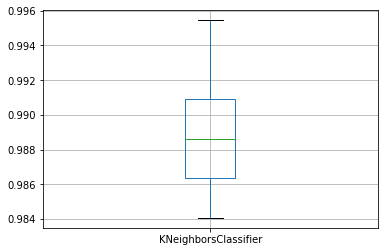

---> Algoritmo: GaussianNB 
Resultado:



,Iteração,Acurácia,Micro Revocação,Macro Revocação,Micro Precisao,Macro Precisao,Micro F1,Macro F1,Melhores Parâmetros
0,1,0.279545,0.279545,0.582540,0.279545,0.536544,0.279545,0.267248,"{'priors': None, 'var_smoothing': 1e-09}"
1,2,0.372727,0.372727,0.646208,0.372727,0.551199,0.372727,0.341375,"{'priors': None, 'var_smoothing': 1e-09}"
2,3,0.318182,0.318182,0.616578,0.318182,0.546378,0.318182,0.299423,"{'priors': None, 'var_smoothing': 1e-09}"
3,4,0.280182,0.280182,0.543670,0.280182,0.518478,0.280182,0.265046,"{'priors': None, 'var_smoothing': 1e-09}"
4,5,0.339408,0.339408,0.641089,0.339408,0.553846,0.339408,0.317299,"{'priors': None, 'var_smoothing': 1e-09}"
5,6,0.321185,0.321185,0.592044,0.321185,0.535537,0.321185,0.299638,"{'priors': None, 'var_smoothing': 1e-09}"
6,7,0.325740,0.325740,0.607567,0.325740,0.541530,0.325740,0.304339,"{'priors': None, 'var_smoothing': 1e-09}"
7,8,0.307517,0.307517,0.597666,0.307517,0.539638,0.307517,0.289977,"{'priors': None, 'var_smoothing': 1e-09}"
8,9,0.323462,0.323462,0.619378,0.323462,0.546928,0.323462,0.303677,"{'priors': None, 'var_smoothing': 1e-09}"
9,10,0.323462,0.323462,0.606330,0.323462,0.541296,0.323462,0.302560,"{'priors': None, 'var_smoothing': 1e-09}"


/mnt/Dados/Mestrado_Computacao_Aplicada_UFMS/documentos_dissertacao/algoritmos/precoce-ms-classification/.venv-precoce-ms/lib/python3.8/site-packages/dataframe_image/_pandas_accessor.py:69: FutureWarning: this method is deprecated in favour of `Styler.to_html()`
  html = '<div>' + obj.render() + '</div>'
[0809/163002.356830:WARNING:sandbox_linux.cc(376)] InitializeSandbox() called with multiple threads in process gpu-process.
[0809/163002.388109:WARNING:bluez_dbus_manager.cc(247)] Floss manager not present, cannot set Floss enable/disable.
[0809/163002.644531:INFO:headless_shell.cc(660)] Written to file /tmp/tmpyxnvot26/temp.png.



Describe:
        Acurácia  Micro Revocação  Macro Revocação  Micro Precisao  \
count  10.000000        10.000000        10.000000       10.000000   
mean    0.319141         0.319141         0.605307        0.319141   
std     0.027057         0.027057         0.029507        0.027057   
min     0.279545         0.279545         0.543670        0.279545   
25%     0.310183         0.310183         0.593449        0.310183   
50%     0.322323         0.322323         0.606948        0.322323   
75%     0.325171         0.325171         0.618678        0.325171   
max     0.372727         0.372727         0.646208        0.372727   

       Macro Precisao   Micro F1   Macro F1  
count       10.000000  10.000000  10.000000  
mean         0.541138   0.319141   0.299058  
std          0.009956   0.027057   0.022202  
min          0.518478   0.279545   0.265046  
25%          0.537318   0.310183   0.292338  
50%          0.541413   0.322323   0.301099  
75%          0.546791   0.325171   0

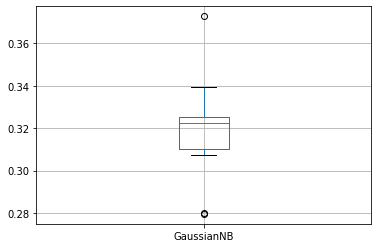


Boxplot de acurácia de todos os modelos:


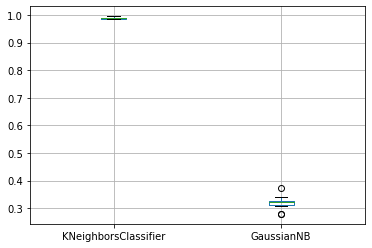

Desvio padrão da acurácia dos algoritmos:


KNeighborsClassifier    0.004132
GaussianNB              0.027057
dtype: float64


Média da acurácia dos algoritmos:


KNeighborsClassifier    0.989072
GaussianNB              0.319141
dtype: float64

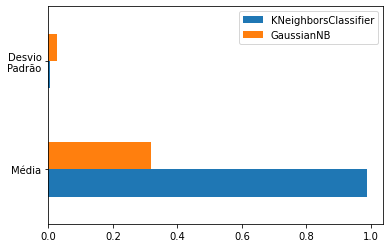

*****FIM IMPRIMIR RESULTADOS MODELOS******


In [6]:
# k-nearest neighbors
# Algorithm parameter{‘auto’, ‘ball_tree’, ‘kd_tree’, ‘brute’}, default=’auto’ for now is in auto
# ‘auto’ will attempt to decide the most appropriate algorithm based on the values passed to fit method.
# leaf_sizeint, default=30
# Is the best option?
# Varying the k neighbors parameter, we can find the best k value for the classification.
param_dist = {
    'n_neighbors': list(np.arange(3, 20, 2)),
    'metric': ['euclidean'],
    'weights': ['uniform', 'distance']
}
classifiers[KNeighborsClassifier().__class__.__name__] = [KNeighborsClassifier(), param_dist]

# Naive bayes
# Algorithm to be beaten. Used as base.
# It's generating low values. Is it because the attributes are not discrete (words)?
# For non-discrete attributes, should I use another algorithm?
param_dist = {}
classifiers[GaussianNB().__class__.__name__] = [GaussianNB(), param_dist]

# # Decision Trees (c4.5)
# # Algorithm parameter settings, look for more (see documentation):
# # min_impurity_decrease ??? The algorithm presents an error when a value greater than 0.0 is added
# # ccp_alpha ??? the algorithm has an error when increasing the value
# # max_depth -> use a great search to calibrate
# # class_weight
# # I identified, that for the default parameters, the maximum depth of the created tree is 9. For the current amount of data.
# # criterion{“gini”, “entropy”},
# param_dist = {
#     'criterion': ['gini', 'entropy'],
#     'max_depth': list(np.arange(1, 11)) + [None],
#     'random_state': [0],
#     'class_weight': ['balanced', None]
# }
# classifiers[DecisionTreeClassifier().__class__.__name__] = [
#     DecisionTreeClassifier(), param_dist]

# # Neural Network
# # param_dist = {'solver': ['sgd'], 'learning_rate' : ['constant'], 'momentum' : scipy.stats.expon(scale=.1),
# # 'alpha' : scipy.stats.expon(scale=.0001), 'activation' : ['logistic'],
# # 'learning_rate_init' : scipy.stats.expon(scale=.01), 'hidden_layer_sizes':(200,100), 'max_iter':[500]}
# # learning_rate_init -> change this parameter if the result is not good
# # max_iter -> can also help to improve the result
# # hidden_layer_sizes -> (layer_x_with_y_neurons, layer_x_with_y_neurons)
# param_dist = {
#     'solver': ['adam'],
#     'learning_rate': ['constant'],
#     'alpha': [0.001],
#     'activation': ['relu'],
#     'hidden_layer_sizes': (200, 100),
#     'max_iter': [1000]
# }
# classifiers[MLPClassifier().__class__.__name__] = [
#     MLPClassifier(), param_dist]

# # Vector Support Machine
# # kernel: ‘linear’, ‘poly’, ‘rbf’
# #     # C: 10^x (-2 a 2)
# #     # 'max_iter': [100, 1000]
# #     # gamma : auto
# param_dist = {
#     'kernel': ['linear', 'poly', 'rbf'],
#     'C': list(np.power(10, np.arange(-2, 2, dtype=np.float16))),
#     'max_iter': [10000],
#     'gamma': ['auto']
# }
# classifiers[SVC().__class__.__name__] = [SVC(), param_dist]

# # Random forest classifier
# param_dist = {
#     'n_estimators': [10, 50, 100],
#     'criterion': ['gini', 'entropy'],
#     'max_depth': list(np.arange(1, 11)) + [None],
#     'random_state': [0],
#     'class_weight': ['balanced', None]
# }
# classifiers[RandomForestClassifier().__class__.__name__] = [
#     RandomForestClassifier(), param_dist]

# Running the classifiers
models_results = pattern_extraction.run_models(x=x, y=y, models=classifiers, models_results=models_results)

reports.models_results(
    models_results=models_results, path_save_fig='./plots', display_results=True)